# Final position in variable interval


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_pgrmlly_outlier_treatment
from utils.custom_scorers import balanced_accuracy_1interval_score

import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


First we will do the validation of the model that predicts the final position of each driver at a ±1 interval.


In [2]:
df = pd.read_csv("../assets/data/processed/base_model.csv")
X = pd.read_csv("../assets/data/processed/base_model_X.csv")
y = df["positionFinal"]

## K-Nearest Neighbors


Performance without treatment: 0.3479507340302795
Best performance with treatment:
     threshold = 8.000000000000004
     performance = 0.34845627016081565


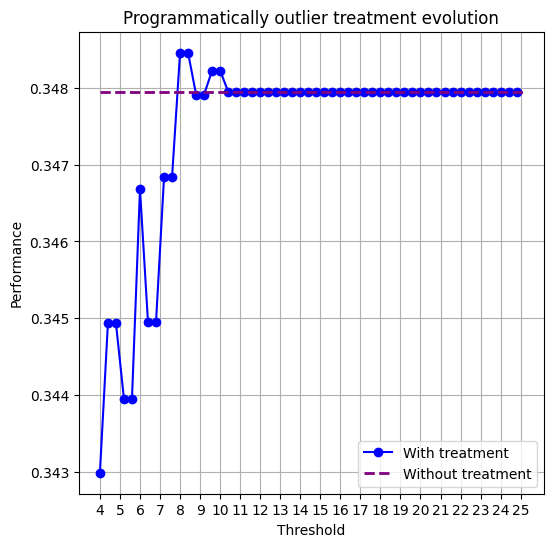

In [3]:
X_selected = X[
    [
        "positionGrid",
        "constructorRef",
        "driverWins",
    ]
]
knn = KNeighborsClassifier(n_neighbors=100, metric="manhattan", weights="uniform")
model_pgrmlly_outlier_treatment(
    knn,
    df,
    X_selected,
    y,
    make_scorer(balanced_accuracy_1interval_score),
    (4, 25.1, 0.4),
)

Performance without treatment: 0.2852551152551152
Best performance with treatment:
     threshold = 6.8000000000000025
     performance = 0.28602765920947737


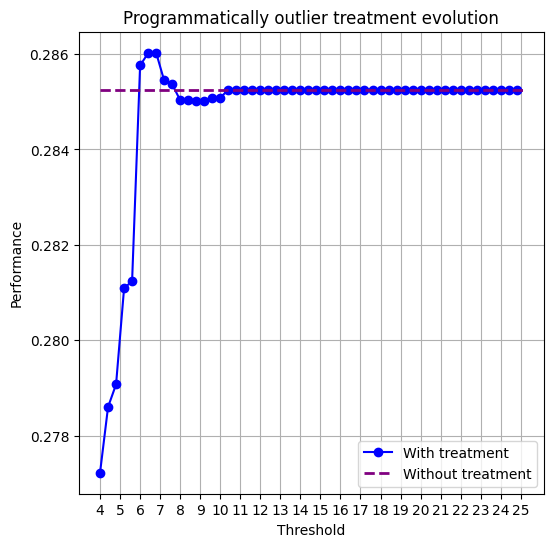

In [4]:
knn = KNeighborsClassifier(n_neighbors=100, metric="manhattan", weights="uniform")
model_pgrmlly_outlier_treatment(
    knn,
    df,
    X,
    y,
    make_scorer(balanced_accuracy_1interval_score),
    (4, 25.1, 0.4),
)

## Decision Tree


Performance without treatment: 0.3492832462150644
Best performance with treatment:
     threshold = 7.600000000000003
     performance = 0.3492832462150644


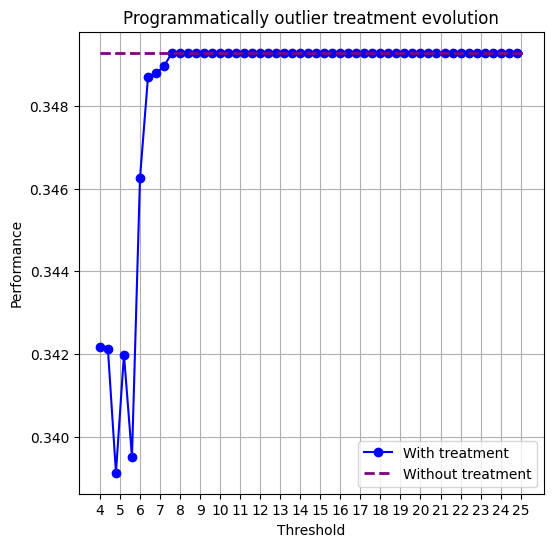

In [5]:
X_selected = X[
    [
        "carNumber",
        "positionGrid",
        "driverNationality",
        "constructorNationality",
        "raceYear",
        "raceRound",
        "grandPrix",
        "raceTime",
        "circuitRef",
        "circuitLocation",
        "circuitLng",
        "circuitAlt",
        "constructorWins",
        "q1",
        "q2",
        "q3",
        "driverAgeToday",
    ]
]
tree = DecisionTreeClassifier(max_depth=4, criterion="log_loss", splitter="best")
model_pgrmlly_outlier_treatment(
    tree,
    df,
    X_selected,
    y,
    make_scorer(balanced_accuracy_1interval_score),
    (4, 25.1, 0.4),
)

Performance without treatment: 0.3423765333992606
Best performance with treatment:
     threshold = 11.200000000000006
     performance = 0.3423765333992606


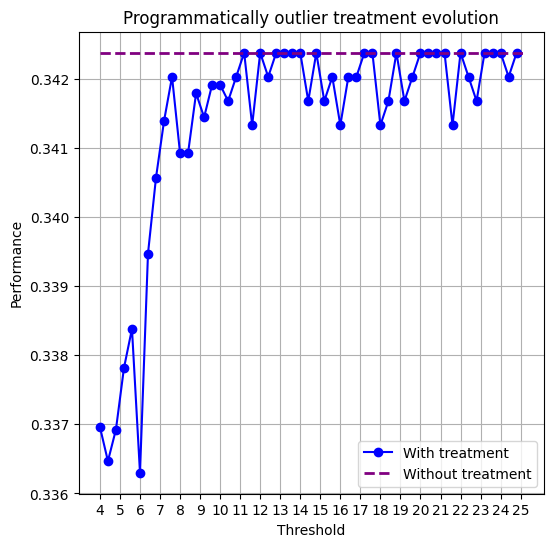

In [6]:
tree = DecisionTreeClassifier(max_depth=4, criterion="log_loss", splitter="best")
model_pgrmlly_outlier_treatment(
    tree,
    df,
    X,
    y,
    make_scorer(balanced_accuracy_1interval_score),
    (4, 25.1, 0.4),
)

## Random Forest


Performance without treatment: 0.36315734560052754
Best performance with treatment:
     threshold = 9.200000000000005
     performance = 0.36419836476654655


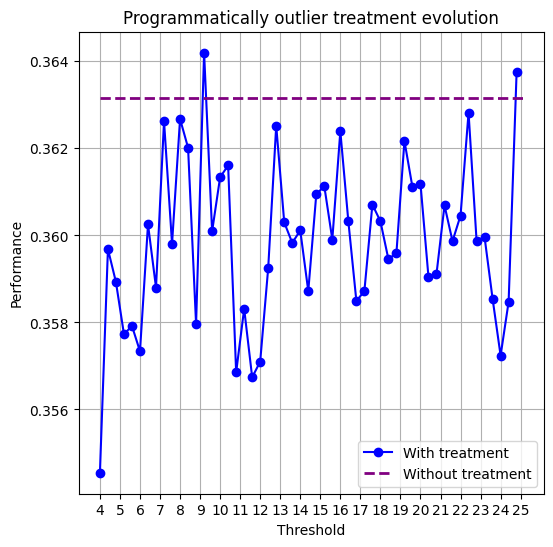

In [7]:
X_selected = X[
    [
        "carNumber",
        "positionGrid",
        "driverRef",
        "constructorNationality",
        "raceRound",
        "driverWins",
    ]
]
random_forest = RandomForestClassifier(
    max_depth=5, n_estimators=432, criterion="log_loss"
)
model_pgrmlly_outlier_treatment(
    random_forest,
    df,
    X_selected,
    y,
    make_scorer(balanced_accuracy_1interval_score),
    (4, 25.1, 0.4),
)

Performance without treatment: 0.3422235172235172
Best performance with treatment:
     threshold = 5.200000000000001
     performance = 0.3463472659495387


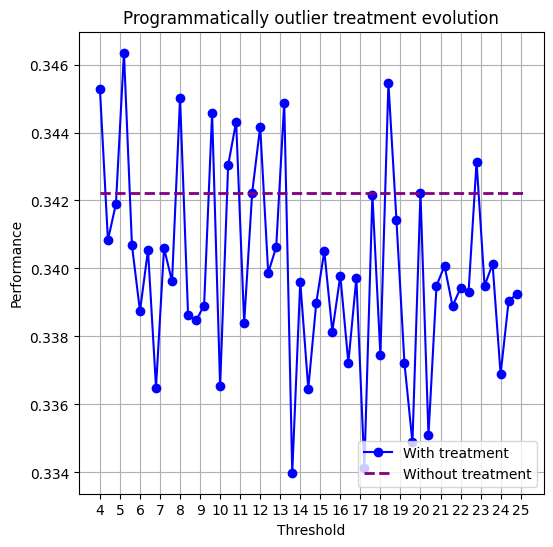

In [8]:
random_forest = RandomForestClassifier(
    max_depth=5, n_estimators=432, criterion="log_loss"
)
model_pgrmlly_outlier_treatment(
    random_forest,
    df,
    X,
    y,
    make_scorer(balanced_accuracy_1interval_score),
    (4, 25.1, 0.4),
)

## Multilayer Perceptron


Performance without treatment: 0.352892650279014
Best performance with treatment:
     threshold = 18.000000000000014
     performance = 0.3583594393821666


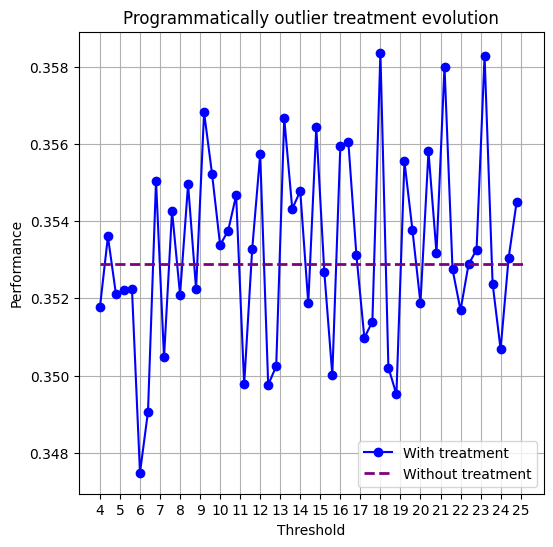

In [9]:
X_selected = X[
    [
        "positionGrid",
        "driverRef",
        "driverNumber",
        "constructorRef",
        "raceRound",
        "circuitCountry",
        "circuitAlt",
        "driverWins",
        "constructorWins",
        "driverAgeToday",
    ]
]
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 27, 24))
model_pgrmlly_outlier_treatment(
    nn,
    df,
    X_selected,
    y,
    make_scorer(balanced_accuracy_1interval_score),
    (4, 25.1, 0.4),
)

Performance without treatment: 0.3519388523933978
Best performance with treatment:
     threshold = 9.200000000000005
     performance = 0.3572877227990865


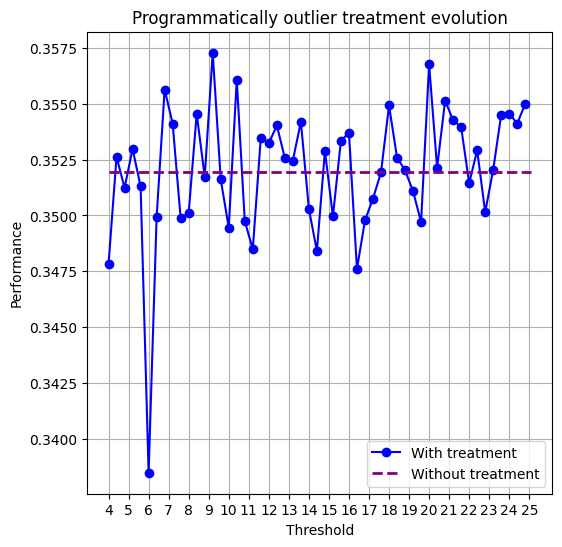

In [10]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(46, 27, 24))
model_pgrmlly_outlier_treatment(
    nn,
    df,
    X,
    y,
    make_scorer(balanced_accuracy_1interval_score),
    (4, 25.1, 0.4),
)

## Results


Considering the randomness of the models, the results have not improved.
